In [425]:
import krwordrank
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

from krwordrank.sentence import summarize_with_sentences
from konlpy.tag import Mecab
from gensim.models import Word2Vec
import krwordrank
from krwordrank.word import KRWordRank
from krwordrank.word import summarize_with_keywords

In [426]:
data = pd.read_csv('review_modify.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18597 entries, 0 to 18596
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   식당이름    18597 non-null  object
 1   리뷰      18597 non-null  object
 2   리뷰_리스트  18597 non-null  object
dtypes: object(3)
memory usage: 436.0+ KB


In [427]:
data['리뷰길이'] = data['리뷰'].apply(len)

## 리뷰길이가 200자 이상인 것들만 뽑는다.
data = data[data['리뷰길이'] > 200]

In [428]:
import ast
## 리뷰_리스트 컬럼 type : str -> list
data['리뷰_리스트']= data['리뷰_리스트'].apply(ast.literal_eval)

In [429]:
data['리뷰개수'] = data['리뷰_리스트'].apply(len)

In [430]:
## 가게 100개 샘플링
data100 = data.sample(100)
data100 = data100.reset_index(drop=True)
data100.sort_values(by='리뷰개수', ascending = False)

,식당이름,리뷰,리뷰_리스트,리뷰길이,리뷰개수
47,신연경-본점,배달 짱빨라용 맛도좋아요굿뜨 맛있습니다요맛있어요 담에 짬뽕국물 서비스좀 ...,"[배달 짱빨라용 맛도좋아요, 굿뜨 맛있습니다요, 맛있어요 담에 짬뽕국물 ...",102679,3198
10,교촌치킨-경희대점,치킨이 넘튀겨줘서 말라서 맛이 별로였어요맛있게 잘먹었습니다 히히 야밤엔 치킨이지배...,"[치킨이 넘튀겨줘서 말라서 맛이 별로였어요, 맛있게 잘먹었습니다 , 히히 야밤엔 ...",19864,789
48,놀부부대찌개-신촌점,배터져여 배달 끝내주네영맛있게 잘 먹었습니다 맛있고 빨리왔습니다오랜만에 부대찌개...,"[배터져여 배달 끝내주네영, 맛있게 잘 먹었습니다 , 맛있고 빨리왔습니다, 오랜...",14491,455
38,미소당빵공장,넘넘 맛있게 잘먹었어요 서비스도 맛도 굿굿 맛있습니다 ...,"[넘넘 맛있게 잘먹었어요 서비스도 맛도 굿굿 , 맛있습니다, ...",11123,247
40,브릭오븐,내부가 넓어요 외국인들이 주문을 받아서 첨에 당황쓰 피자는 구냥 평범해요피자덕후라 ...,"[내부가 넓어요 외국인들이 주문을 받아서 첨에 당황쓰 피자는 구냥 평범해요, 피자덕...",33902,247
...,...,...,...,...,...
99,세븐차이나,깔끔한 공간과 산이 주변에 있어서 좋았어요 코스로 여러 요리를 맛 보았는데 음식 ...,[깔끔한 공간과 산이 주변에 있어서 좋았어요 코스로 여러 요리를 맛 보았는데 음식...,424,3
24,더포터하우스,삼성동 더포터하우스 노력과 정성의 즐거움 연결성의 아쉬움 생일만찬 취...,[ 삼성동 더포터하우스 노력과 정성의 즐거움 연결성의 아쉬움 생일만찬 ...,5286,2
23,용천각,야심한 시각 뜬금없이 리뷰를 남기고 싶어서 남겨봅니당 노원3번이나 4번 13...,[야심한 시각 뜬금없이 리뷰를 남기고 싶어서 남겨봅니당 노원3번이나 4번 1...,699,2
26,그날맥주,미삼에서 골목골목 다니다 우연히 가본 곳 그날맥주 우리가 간 날은 아무도 없...,[미삼에서 골목골목 다니다 우연히 가본 곳 그날맥주 우리가 간 날은 아무도 ...,258,2


/opt/anaconda3/envs/tensor2/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/tensor2/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/envs/tensor2/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 48624 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/envs/tensor2/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/envs/tensor2/lib/python3.6/site-packages/matplotlib/b

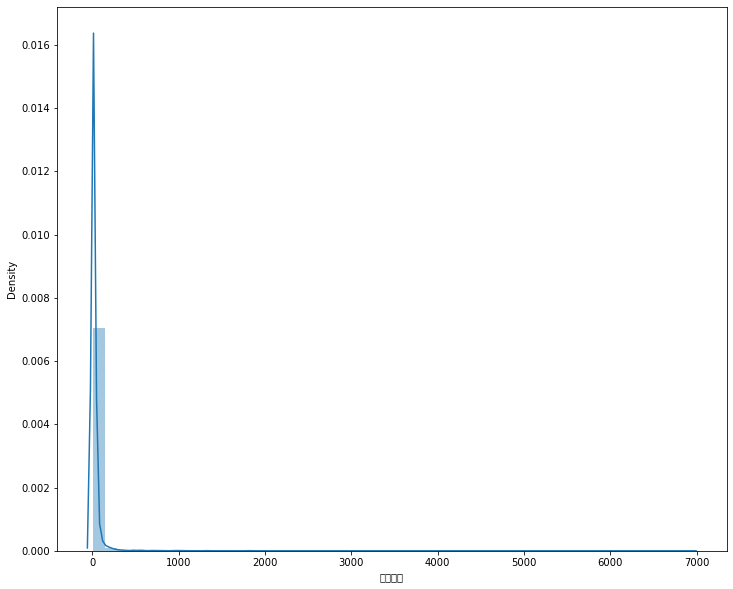

In [431]:
plt.figure(figsize = (12,10))
sns.distplot(data['리뷰개수'])
plt.show()

# 리뷰 토큰화

In [472]:
## Mecab 형태소 분석함수
mecab = Mecab()

def tokenizer(row):
  return mecab.morphs(row)

In [473]:
## 리뷰 토큰화 by Mecab
data['리뷰_토큰'] = data['리뷰'].apply(tokenizer)

## sentences 변수에 토큰 저장
sentences = data['리뷰_토큰']

In [474]:
# 토큰으로부터 벡터를 생성
model = Word2Vec(sentences, size=300, window=5, min_count=5, workers=3)
 

word_vectors = model.wv
 
vocabs            = word_vectors.vocab.keys()
word_vectors_list = [word_vectors[v] for v in vocabs]

In [ ]:
model.

In [475]:
## 토큰의 개수
len(word_vectors_list)

34821

# Kewords 추출

In [489]:
stopwords = {'먹었습니다', '굿굿굿굿굿굿굿굿', '주셔서', '맛있', '하였', '라구', '너무', '맛이', '정말', '있는', '좋아', '괜찮', '음식', '많이', '진짜', '생각', '느낌', '먹었', '메뉴', '여기', '좋았', '그냥', '먹어', '주문', '먹고', '아니', '먹을', '다른', '조금', '좋은', '들어', '맛은', '정도', '엄청', '있어', '방문', '먹는', '사람', '아주', '하나', '같이', 'ㅎㅎ', '있다', '가게', '별로', '양이', '먹으', '그런', '처음', '같은', '맛도', '그리고', '약간', 'ㅋㅋ', '않고', '있었', '같아요', '좋고', '같아', '살짝', '그래도', '역시', '제일', 'ㅠㅠ', '곳이', '하는', '좋아요', '기대', '나오는', '먹기', '다시', '많아', '식당', '근데', '완전', '하지만', '양도', '시간', '항상', '만족', '시켜', '자주', '시켰는데', '있어서', '같다', '나오', '매우', '자리', '추가', '특히', '맛을', '가장', '식사', '테이블', '사장님', '많고', '많은', '없는', '함께', '나는', '생각보다', '적당', '모두', '친구', '배달', '바로', '좋다', '하고',  '굉장히', '무난', '이런', '저는', '종류', '않은', '요리', '먹었는데', '좋았어요', '아닌', '계속', '기본', '많아서', '그래', '아쉬', '부드', '해서', '편이', '손님', '재료', '근처', '않았', '이렇게', '않아', '한번', '리뷰', '뭔가', '개인적으로', '느껴', '시켰', '직원', '나온', '다음', '있고', '먹으면', '가서', '제가', '비해', '포장', '구워', '잘먹었습니다', '거의', '갔는데', '인분', '빠르고', '그리', '빨리', '내가', '안에', '다만', '공간', '직접', '기분', '그렇', '감사합니다', '먹은', '그런지', '간이', '마시', '기다', '사람이', '적당히', '사실', 'ㅋㅋㅋ', '매장', '동네', '들어가', '위에', '향이', '했는데', '느낌이', '없어', '따로', '일단', '시키', '원래', '없이', '분위', '오늘', '빵이', '친절하', '평범', '면이', '다음에', '대기', '분들', '것이', '맛잇', '가격이', 'ㅜㅜ', '좋네요',  '보니', '위치', '깔끔하고', '오랜만에', '요즘', '가면', '좋을', '때문에', '찾아', '맛있었', '나쁘지', '오래', '들어간', '양은', '맛있어',  '모르겠', '것도',  '맛나', '보통', '냄새' '이곳' '있습니다', '선택', '작은', '가는', '내부', '있음', '그렇게', '모르', '않는', '괜찮은', '사이', '달지', '그래서', '이스크림', '좋아하', '좋습니다', '오픈', '와서', '개인', '집이', '없었', '나왔', '없다', '일반', '좋아하는', '훨씬', '주신', '웨이팅이', '서비', '기억', '밥이', '자체', '넣어', '감사', '여러', '전체적으로', '분위기도', '시킬', '좋았다', '나와', '가득', '구성', '예쁘', '가격도', '우리', '올라', '싶은', '아쉬웠', '이름', '어울', '때문', '하지', '없고', '이상', '상당히', '없어서', '않아서', '조합', '언제나', '합니다',  '아니라', '굳이', '식감이', '한다', '이집', '번창하세요', '단계', '있지만',  '아쉽', '좋았습니다', '모든', '찍어', '가끔', '호점', '워낙', '나름', '있을', '배달도', '부분', '여긴', '중에', '진하고'}

## 리뷰_리스트 컬럼에서 keyword 추출하는 함수
## 입력 : train_data(dataframe, 리뷰_리스트 컬럼을 포함할 것), stopwords(불용어)
## 출력 : train_data(dataframe, 태그 컬럼에 출력키워드 포함)
def summarize_keywords(train_data, stopwords):
    
    for index in range(len(train_data)):
        try:
            keywords = summarize_with_keywords(train_data['리뷰_리스트'][index], num_keywords=10, min_count=2,\
                max_length=10, beta=0.85, max_iter=10, stopwords=stopwords, verbose=False)
            if len(keywords) == 0: ## 키워드 없으면 빈 문자열 '[]' 저장
                train_data.loc[index, '태그'] = str([])
            else:
                keyword_list = []
                for keyword in keywords.keys():
                    if keyword not in stopwords:
                        keyword_list.append(keyword)

                train_data.loc[index, '태그'] = str(keyword_list)

        except :
            pass
        
    ## 태그의 type을 str -> list로 변경
    train_data['태그']= train_data['태그'].apply(ast.literal_eval)
    return train_data

In [454]:
## 아라빅하우스 리뷰없음
# data[data['식당이름'] == '아라빅하우스' ]['리뷰']
# data.loc[10078,'리뷰']

In [468]:
# data100[['식당이름','태그']].to_csv('tags_before2.csv')

# 유사단어 태그에 추가하기

In [490]:
## 추출한 키워드로 리뷰에서 유사한 단어를 구하는 함수
## 입력 : train_data(dataframe, 태그 컬럼을 포함할 것)
## 출력 : train_data(dataframe)
def add_tag_fom_keywords(dataframe):
    for index in range(len(dataframe)):
        tag_list = []
        for i in dataframe['태그'][index]:
            try:
                tags = model.wv.most_similar(positive=[i],  negative=[], topn=10)
                tag_list += [tag[0] for tag in tags if tag not in tag_list]

            except:
                pass
        dataframe['태그'][index] += tag_list
        dataframe['태그'][index] = list(pd.Series(dataframe['태그'][index]).unique())
    
    return dataframe

In [368]:
# data100.to_csv('tags_after2.csv')

In [479]:
#########################################  실행  #############################################################

data100 = summarize_keywords(data100, stopwords)
add_tag_fom_keywords(data100)

/opt/anaconda3/envs/tensor2/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/tensor2/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/opt/anaconda3/envs/tensor2/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  from ipykernel import kernelapp as app


,식당이름,리뷰,리뷰_리스트,리뷰길이,리뷰개수,태그
0,광명수산,수족관이 밖이랑 매장 2곳에 다양한 재료가 가득했구요 1층과 2층으로 나뉘어 있고...,[수족관이 밖이랑 매장 2곳에 다양한 재료가 가득했구요 1층과 2층으로 나뉘어 있...,1022,18,"[맛있어요, 메추리알, 회가, 수족관, 2층, 광어, 가격, 주차, 매운탕, 1층,..."
1,서울두부,요리 를 맛보았다는 느낌에 너무 만족스러웠어요 좋아요보기에도 넘 맛있어 보여요 ...,"[ 요리 를 맛보았다는 느낌에 너무 만족스러웠어요 좋아요, 보기에도 넘 맛있어 보여...",286,8,"[두부, 배추, 청경채, 미나리, 대파, 숙주, 애호박, 양배추, 무채, 표고버섯,..."
2,도연하다,안주가 정갈하게 차려져 나온다 도가니수육은 국물을 같이 먹을수 있고 리필도된다 가격...,[안주가 정갈하게 차려져 나온다 도가니수육은 국물을 같이 먹을수 있고 리필도된다 가...,5095,25,"[도가니, 맛있는, 가격, 안주가, 감자전, 10000원, 사진엔, 나온다, 모임,..."
3,야스미,과일상자 무용지물 입니다보기에도 일식의 진미가 보여요 내부도 깔끔하고 분위기도...,"[과일상자 무용지물 입니다, 보기에도 일식의 진미가 보여요 , 내부도 깔끔하고...",240,8,"[음식도, 분위기, 분위, 인테리어, 경치, 음악, 조명, 실내, 선곡, 전망, 채..."
4,프로간장새우,기대 안하고 그냥 찾아들어가서 그런지너무맛있엇어요 굴하고 새우말이 고추전 전부 맛잇...,[기대 안하고 그냥 찾아들어가서 그런지너무맛있엇어요 굴하고 새우말이 고추전 전부 맛...,248,5,[간장새우]
...,...,...,...,...,...,...
95,버거헌터 IFC점,수제버거집입니다 주차는 일정 금액 이상 식사시 1시간 무료였는데 정확히 기억이 나...,[수제버거집입니다 주차는 일정 금액 이상 식사시 1시간 무료였는데 정확히 기억이 ...,505,6,"[기억이, 할라피뇨, 버거, 베이컨, 햄버거, 비사리, 패티, 프라이, 와퍼, 나인..."
96,홍맛술,서비스로 주는 계란찜 괜찮고 꼬막무침이랑 곱창 볶음밥도 괜찮다 다만 식당 내부에서...,[서비스로 주는 계란찜 괜찮고 꼬막무침이랑 곱창 볶음밥도 괜찮다 다만 식당 내부에...,2542,16,"[꼬막, 소면, 주는, 서비스, 자연산, 백골뱅이, 스팸, 많음, 젊은, 간만에, ..."
97,롯데리아,롯데리아 그져 감흥없는 맛이네요 | | 분발하세요더블 2버거 맛있습니다 후...,"[롯데리아 그져 감흥없는 맛이네요 | | 분발하세요, 더블 2버거 맛있습니...",923,14,"[롯데리아, 햄버거, 더블, 맛있습니다, 치즈, 모짜렐라, 같습니, 따끈, 소스, ..."
98,진부령황태촌,쌀쌀한 날씨로 접어드는 길목따끈한 국물이 불현듯 그래 오늘은 동태탕을 먹어봐야겠어 ...,[쌀쌀한 날씨로 접어드는 길목따끈한 국물이 불현듯 그래 오늘은 동태탕을 먹어봐야겠어...,2185,14,"[국물이, 깔끔하게, 검색없이, 개인적으로는, 전문점, 담기고, 직원분들도, 위치한..."
